In [1]:
import pandas as pd # Dataframe işlemleri için kullanılan kütüphane
import numpy as np # Matris işlemleri için kullanılan kütüphane

In [2]:
dir_path = './CMaps/' # Dosyaların okunacağı dizin
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfr_dmd', 'W31', 'W32'] 
col_names = index_names + setting_names + sensor_names

In [3]:
def open_df(number):
    train = pd.read_csv((dir_path+'train_FD00' + str(number) + '.txt'), sep='\s+', header=None, names=col_names)
    test = pd.read_csv((dir_path+'test_FD00' + str(number) + '.txt'), sep='\s+', header=None, names=col_names)
    y_test = pd.read_csv((dir_path+'RUL_FD00' + str(number) + '.txt'), sep='\s+', header=None, names=['RUL'])
    return train, test, y_test

In [4]:
train, test, y_test = open_df(1)

In [5]:
train.head() # İlk 5 eğitim verisi

,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfr_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
train[train.unit_nr == 1] # 1. motorun eğitim verileri

,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfr_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [7]:
test.head() # İlk 5 test verisi

,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfr_dmd,W31,W32
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [8]:
test[test.unit_nr == 1] # 1. motorun test verileri

,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfr_dmd,W31,W32
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,...,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,...,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,...,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,...,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820


In [9]:
y_test.head() # Test için kullanılacak bağımlı değişken verileri

,RUL
0,112
1,98
2,69
3,82
4,91


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

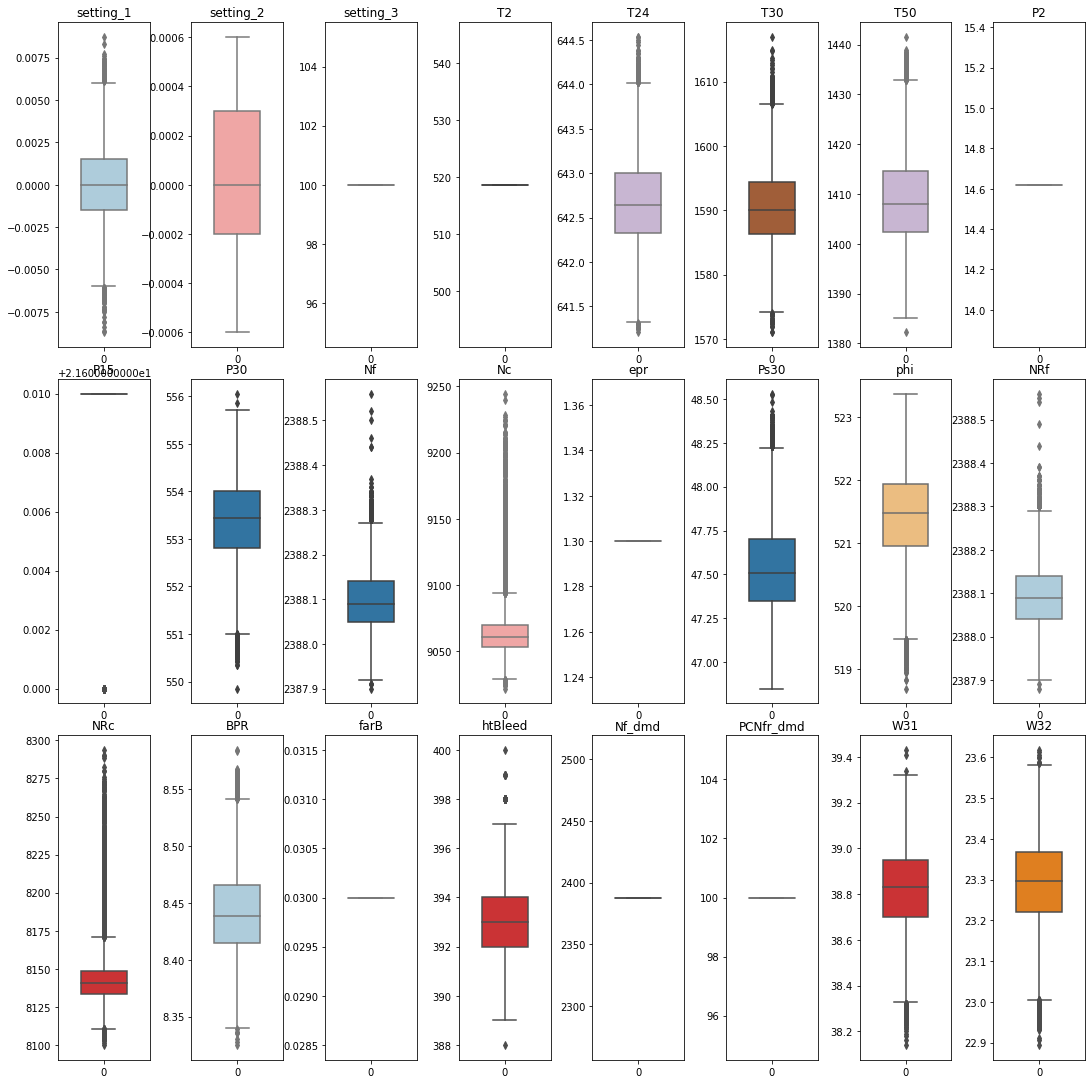

In [11]:
# Veri dağılımlarının kutu grafikleriyle gösterimi
fig, axes = plt.subplots(int(len(train.columns[2:])/8), 8, figsize=(15, 15))
fig.tight_layout()
i, j = 0, 0 
for feature in train.columns[2:]:
    sns.boxplot(ax=axes[i, j], data=train[feature], width=0.5, color=random.choice(sns.color_palette("Paired"))).set(title=feature)
    j = j + 1
    if j == 8:
        j = 0
        i = i + 1

In [12]:
# Sabit değişkenlerin veri setinden çıkartılması
drop_labels = ['setting_3', 'T2', 'P2', 'epr', 'farB', 'Nf_dmd', 'PCNfr_dmd'] 
train = train.drop(drop_labels, axis=1)

In [13]:
def add_remaining_useful_life(df):
    # Her birim için toplam döngü sayısının alınması
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Maksimum döngü değerinin orijinal çerçeveyle birleştirilmesi
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Her satır için kalan kullanım ömrünün hesaplanması
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # Gerek kalmadığı için maksimum döngü değerinin çıkarılması
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

In [14]:
train = add_remaining_useful_life(train) # Eğitim verileri için RUL'un hesaplanması

In [15]:
drop_labels = index_names + drop_labels

In [16]:
X_train = train.drop(index_names, axis=1) # Eğitim verileri için bağımsız değişkenlerin atanması
y_train = X_train.pop('RUL') # Eğitim verileri için bağımlı değişkenin atanması
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1) # Test verileri için bağımsız değişkenlerin atanması 

In [17]:
# Hata metrikleri için kullanılacak kütüphaneler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [18]:
# Ölçeklendirme için kullanılacak kütüphaneler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

In [19]:
# Regresyon modelleri için kullanılacak kütüphaneler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import SGDRegressor

In [20]:
def fit_predict(X_train, X_test, y_train, y_test, model): # Eğitim için kullanılacak fonksiyon
    model.fit(X_train, y_train) # Modelin eğitilmesi
    y_pred = model.predict(X_test) # Tahminlemenin yapılması
    rmse = np.sqrt(mse(y_test, y_pred)) # RMSE değerinin hesaplanması
    r2 = r2_score(y_test, y_pred) # R^2 Score değerinin hesaplanması
    return rmse, r2

In [21]:
def scaling(scaler): # Ölçeklendirme için kullanılacak fonksiyon
    scaled_X_train=scaler.fit_transform(X_train) # Eğitim verilerinin ölçeklendirilmesi
    scaled_X_test=scaler.transform(X_test) # Test verilerinin ölçeklendirilmesi
    return scaled_X_train, scaled_X_test

In [22]:
lr = LinearRegression() # Lineer Regresyon modelinin tanımlanması
lr.fit(X_train, y_train) # Modelin eğitilmesi
y_pred = lr.predict(X_test) # Tahminlerin oluşturulması
rmse = np.sqrt(mse(y_test, y_pred)) # RMSE değerinin hesaplanması
r2 = r2_score(y_test, y_pred) # R^2 Score değerinin hesaplanması
print('RMSE:', rmse, 'R2-Score:', r2) 

RMSE: 32.04109478173165 R2-Score: 0.4054954961208932


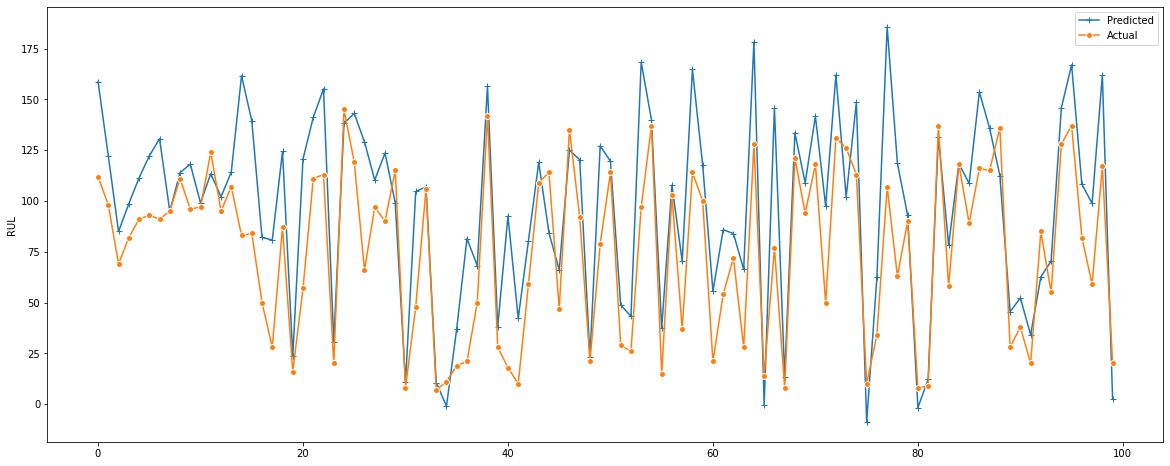

In [23]:
# Yapılan tahminlerle gerçek değerlerin grafik üzerinde kıyaslanması
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(y_pred, marker='+', label='Predicted')
ax.plot(y_test, marker='o', markeredgecolor='w', label='Actual')
ax.set_ylabel('RUL')
ax.legend()
plt.show()

In [24]:
# Optimum kesme değerinin belirlenmesi için modelin farklı değerlerle eğitilmesi
res = []
for i in range(115, 131):
    y_train_clipped = y_train.clip(upper=i)
    rmse, r2 = fit_predict(X_train, X_test, y_train_clipped, y_test, lr)
    res.append(rmse)

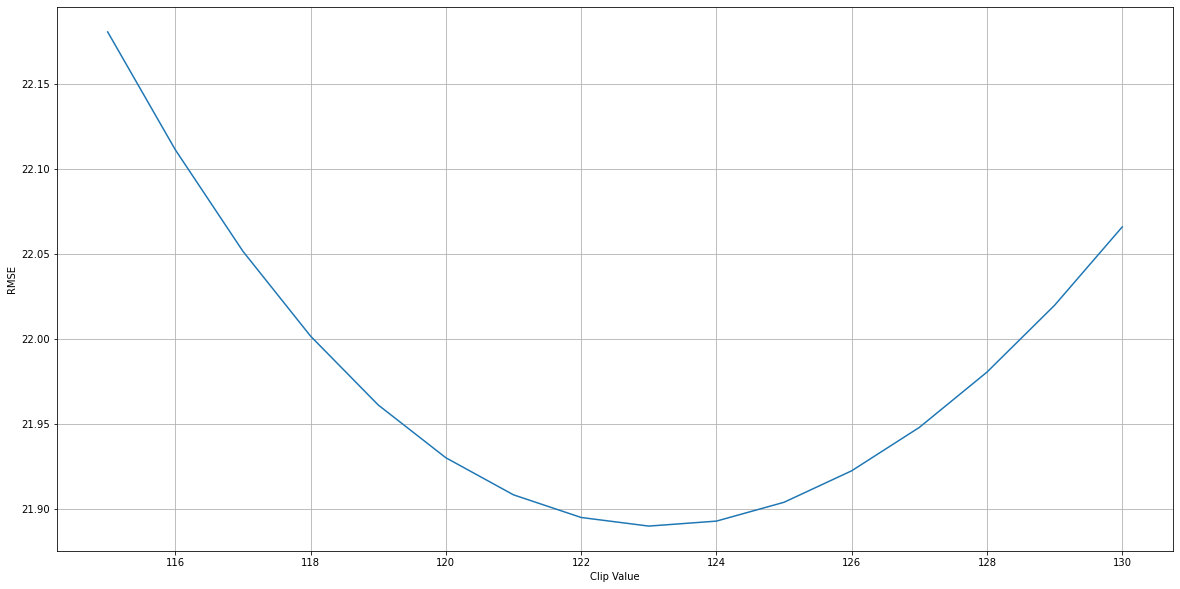

In [25]:
# 115-130 arasındaki her bir kesme değeri için hesaplanan RMSE değerinin gösterimi
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(115, 131), res)
ax.set(xlabel='Clip Value', ylabel='RMSE')
ax.grid()
plt.show()

In [26]:
y_train_clipped = y_train.clip(upper=123) # Minimum hatayı veren 123 değerinin kesme için kullanılması

In [27]:
# Regresyon modellerinin tanımlanması
models = [LinearRegression(), SVR(kernel='linear'), RandomForestRegressor(random_state=1), DecisionTreeRegressor(random_state=1), 
          KNeighborsRegressor(), AdaBoostRegressor(random_state=1), GradientBoostingRegressor(random_state=1), 
          Lasso(random_state=1), BayesianRidge(), PoissonRegressor(), SGDRegressor(random_state=1)]

In [28]:
# Ölçeklendirme modellerinin tanımlanması
scalers = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler(), Normalizer(), QuantileTransformer()]

In [29]:
# Her bir ölçeklendirici için modellerin eğitilmesi ve sonuçların raporlanması
Model = []
Scaler = []
RMSE = []
Score = []
for model in models:
    for scale in scalers:
        scaled_X_train, scaled_X_test = scaling(scale)
        rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, model)
        Model.append(type(model).__name__)
        Scaler.append(type(scale).__name__)
        RMSE.append(rmse)
        Score.append(r2)

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [30]:
d = {'Model': Model, 'Scaler': Scaler, 'RMSE': RMSE, 'R2-Score': Score}

In [31]:
results = pd.DataFrame(data=d)

In [32]:
results # Tüm sonuçlar

,Model,Scaler,RMSE,R2-Score
0,LinearRegression,MinMaxScaler,21.890167,0.722516
1,LinearRegression,MaxAbsScaler,21.890167,0.722516
2,LinearRegression,StandardScaler,21.890167,0.722516
3,LinearRegression,RobustScaler,21.890167,0.722516
4,LinearRegression,Normalizer,21.743687,0.726217
...,...,...,...,...
61,SGDRegressor,MaxAbsScaler,34.637616,0.305237
62,SGDRegressor,StandardScaler,22.091059,0.717399
63,SGDRegressor,RobustScaler,22.122384,0.716597
64,SGDRegressor,Normalizer,43.228108,-0.082114


In [33]:
results.sort_values(by="RMSE").head() # En düşük RMSE değerine sahip sonuçlar

,Model,Scaler,RMSE,R2-Score
14,RandomForestRegressor,StandardScaler,18.446522,0.802953
13,RandomForestRegressor,MaxAbsScaler,18.463985,0.802580
17,RandomForestRegressor,QuantileTransformer,18.472566,0.802396
12,RandomForestRegressor,MinMaxScaler,18.476719,0.802308
15,RandomForestRegressor,RobustScaler,18.478318,0.802273


In [34]:
scaled_X_train, scaled_X_test = scaling(StandardScaler()) # En iyi sonucu üreten ölçeklendiricinin seçilmesi

In [35]:
# Çalışmanın devamında en iyi sonucu üreten Random Forest modeli için hiperparametre optimizasyonu yapılacaktır

In [36]:
# Modeldeki maksimum ağaç derinliği için en iyi değerin saptanması 
rmses = []
max_depth = [10, 20, 50, 75, 100, None]
for i in max_depth:
    rfr = RandomForestRegressor(random_state=1, max_depth=i)
    rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
    rmses.append(rmse)

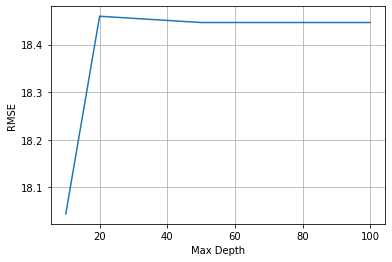

In [37]:
fig, ax = plt.subplots()
ax.plot(max_depth, rmses)
ax.set(xlabel='Max Depth', ylabel='RMSE')
ax.grid()
plt.show()

In [38]:
# Modeldeki maksimum öznitelik değeri için en iyi değerin saptanması 
rmses = []
max_features = [2, 3, 5, 10, 15, None]
for i in max_features:
    rfr = RandomForestRegressor(random_state=1, max_features=i)
    rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
    rmses.append(rmse)

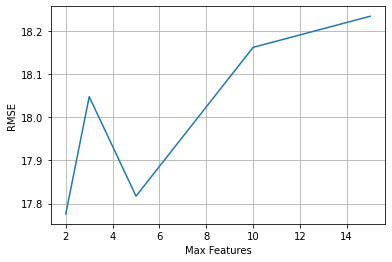

In [39]:
fig, ax = plt.subplots()
ax.plot(max_features, rmses)
ax.set(xlabel='Max Features', ylabel='RMSE')
ax.grid()
plt.show()

In [40]:
# Ağaçta bulunan yapraklardaki minimum numune sayısı için en iyi değerin saptanması 
rmses = []
min_samples_leaf = [1, 2, 3, 5, 10, 15]
for i in min_samples_leaf:
    rfr = RandomForestRegressor(random_state=1, min_samples_leaf=i)
    rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
    rmses.append(rmse)

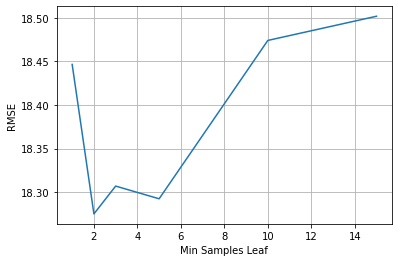

In [41]:
fig, ax = plt.subplots()
ax.plot(min_samples_leaf, rmses)
ax.set(xlabel='Min Samples Leaf', ylabel='RMSE')
ax.grid()
plt.show()

In [42]:
# Düğümleri bölmek için gerekli olan minimum numune sayısı için en iyi değerin saptanması
rmses = []
min_samples_split = [2, 3, 5, 10, 15]
for i in min_samples_split:
    rfr = RandomForestRegressor(random_state=1, min_samples_split=i)
    rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
    rmses.append(rmse)

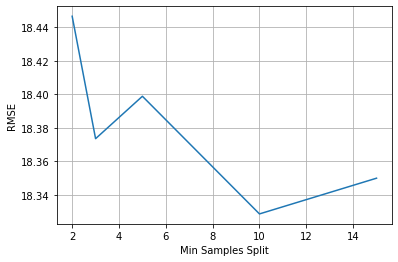

In [43]:
fig, ax = plt.subplots()
ax.plot(min_samples_split, rmses)
ax.set(xlabel='Min Samples Split', ylabel='RMSE')
ax.grid()
plt.show()

In [44]:
# Modelde oluşturulacak ağaç sayısı için en iyi değerin saptanması 
rmses = []
n_estimators = [100, 200, 300, 400, 500]
for i in n_estimators:
    rfr = RandomForestRegressor(random_state=1, n_estimators=i)
    rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
    rmses.append(rmse)

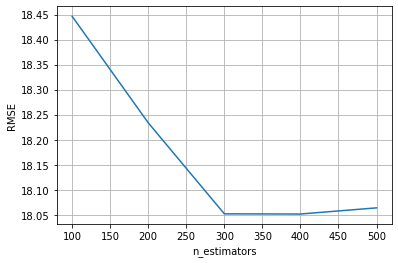

In [45]:
fig, ax = plt.subplots()
ax.plot(n_estimators, rmses)
ax.set(xlabel='n_estimators', ylabel='RMSE')
ax.grid()
plt.show()

In [46]:
# En iyi hiperparametre değerleri ile modelin eğitilmesi
rfr = RandomForestRegressor(random_state=1, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=300)
rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
print('RMSE:', rmse, 'R2-Score:', r2)

RMSE: 17.877765549764796 R2-Score: 0.8149168292427194


In [47]:
from sklearn.model_selection import RandomizedSearchCV # Rastgele parametre değerleri ile modelin eğitilmesi için kullanılacak kütüphane

In [48]:
# Denenecek parametre değerleri
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50, 75, 100, None],
    'max_features': [2, 3, 5, 10, 15, None],
    'min_samples_leaf': [1, 2, 3, 5, 10, 15],
    'min_samples_split': [2, 3, 5, 10, 15],
    'n_estimators': [100, 200, 300, 400, 500]
}

In [49]:
# 300 iterasyonla modelin eğitilmesi
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)

In [50]:
rf_random.fit(scaled_X_train, y_train_clipped)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=10, max_features=2,
                                                   min_samples_leaf=2,
                                                   min_samples_split=10,
                                                   n_estimators=300,
                                                   random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 50, 75, 100,
                                                      None],
                                        'max_features': [2, 3, 5, 10, 15, None],
                                        'min_samples_leaf': [1, 2, 3, 5, 10,
                                                             15],
                                        'min_samples_split': [2, 3, 5, 10, 15],
                                        'n_estimators': [100, 200, 300

In [51]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 50,
 'bootstrap': True}

In [52]:
# Elde edilen en iyi sonuç
rfr = RandomForestRegressor(random_state=1, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300)
rfr.fit(scaled_X_train, y_train_clipped)
y_pred = rfr.predict(scaled_X_test).astype(int)
rmse = np.sqrt(mse(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse, 'R2-Score:', r2)

RMSE: 17.686435480333508 R2-Score: 0.8188571968607241


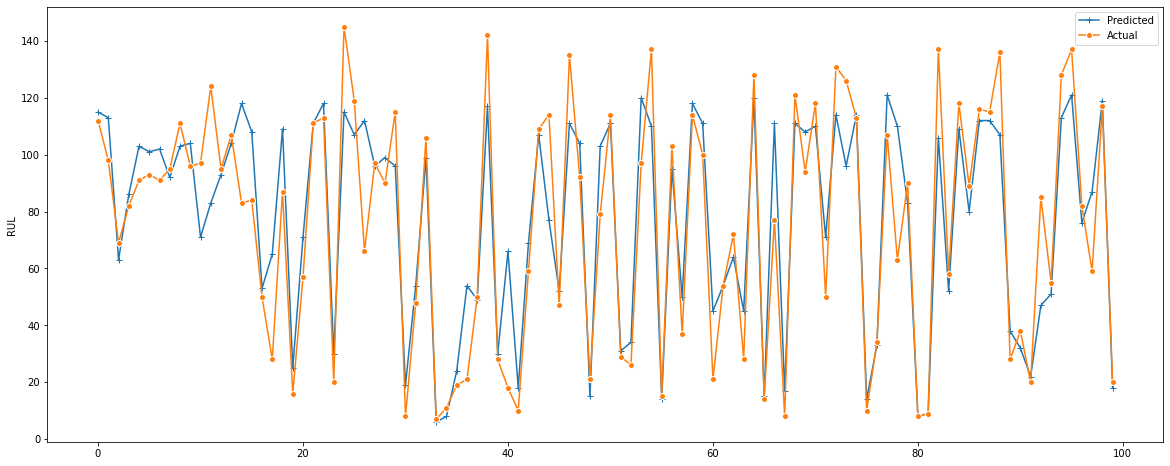

In [53]:
# Yapılan tahminlerle gerçek değerlerin grafik üzerinde kıyaslanması
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(y_pred, marker='+', label='Predicted')
ax.plot(y_test, marker='o', markeredgecolor='w', label='Actual')
ax.set_ylabel('RUL')
ax.legend()
plt.show()

In [54]:
d = {'Actual': y_test.RUL.to_numpy(), 'Prediction': y_pred}
comparison = pd.DataFrame(data=d)

In [55]:
print(comparison.to_string())

    Actual  Prediction
0      112         115
1       98         113
2       69          63
3       82          86
4       91         103
5       93         101
6       91         102
7       95          92
8      111         103
9       96         104
10      97          71
11     124          83
12      95          93
13     107         104
14      83         118
15      84         108
16      50          53
17      28          65
18      87         109
19      16          25
20      57          71
21     111         111
22     113         118
23      20          30
24     145         115
25     119         107
26      66         112
27      97          96
28      90          99
29     115          96
30       8          19
31      48          54
32     106          99
33       7           6
34      11           8
35      19          24
36      21          54
37      50          49
38     142         117
39      28          30
40      18          66
41      10          18
42      59 